<a href="https://colab.research.google.com/github/andrewrudnell/Data-analytic/blob/main/Data_pak_Agung_Metabolobic_Analytic_(TPC_TFC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Packages**

In [27]:
install.packages("metan")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [28]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘later’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’




In [29]:
install.packages("FactoMineR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("openxlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Access Packages**

In [30]:
library(openxlsx)
library(FactoMineR)
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘factoextra’


The following object is masked from ‘package:metan’:

    get_dist




**IMPORT DATA**

In [101]:
df = read.xlsx("(fix) TFC TPC Daun Singkong.xlsx")

In [23]:
head(df)

,GENR,GEN,Position,Loc,Rutin,Nicotiflorin,Hyperoside,Quercetin,Narcissin,Kaempferol,Clovin,Astragalin,Lutein
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,G1T,G1,T,HGB-Dec,21.97692,15.578706,0.2020886,0.04882631,0.13086493,0.013264676,0.002698415,-0.22131275,0.020776096
2,G1M,G1,M,HGB-Dec,12.35904,8.897072,0.3397057,0.01721126,0.08489612,0.003134538,0.002880002,-0.15252847,0.009748685
3,G1B,G1,B,HGB-Dec,12.49300,10.493353,0.1584901,0.03349094,0.01177922,0.007766907,0.002242289,-0.22739025,0.001440072
4,G2T,G2,T,HGB-Dec,29.56206,14.618831,1.3728638,0.04098771,0.28449797,0.002111304,0.019340590,-0.02103070,0.033132961
5,G2M,G2,M,HGB-Dec,26.16121,14.124678,1.1423939,0.01462969,0.18990751,0.001584745,0.007879139,-0.03091039,0.040891751
6,G2B,G2,B,HGB-Dec,23.68743,12.794263,0.7970838,0.05995637,0.16177488,0.006477156,0.005683449,-0.10853592,0.041052339


In [31]:
str(df)

'data.frame':	162 obs. of  13 variables:
 $ GENR        : chr  "G1T" "G1M" "G1B" "G2T" ...
 $ GEN         : chr  "G1" "G1" "G1" "G2" ...
 $ Position    : chr  "T" "M" "B" "T" ...
 $ Loc         : chr  "HGB-Dec" "HGB-Dec" "HGB-Dec" "HGB-Dec" ...
 $ Rutin       : num  22 12.4 12.5 29.6 26.2 ...
 $ Nicotiflorin: num  15.6 8.9 10.5 14.6 14.1 ...
 $ Hyperoside  : num  0.202 0.34 0.158 1.373 1.142 ...
 $ Quercetin   : num  0.0488 0.0172 0.0335 0.041 0.0146 ...
 $ Narcissin   : num  0.1309 0.0849 0.0118 0.2845 0.1899 ...
 $ Kaempferol  : num  0.01326 0.00313 0.00777 0.00211 0.00158 ...
 $ Clovin      : num  0.0027 0.00288 0.00224 0.01934 0.00788 ...
 $ Astragalin  : num  -0.2213 -0.1525 -0.2274 -0.021 -0.0309 ...
 $ Lutein      : num  0.02078 0.00975 0.00144 0.03313 0.04089 ...


In [52]:
df1= df[1:54, ]

In [50]:
df1= df1 [, -1:-2]

In [59]:
df1= df1 [,-1]

In [57]:
df1 <- data.frame(df1[,-1], row.names = df1[,1])

In [60]:
head(df1)

,Rutin,Nicotiflorin,Hyperoside,Quercetin,Narcissin,Kaempferol,Clovin,Astragalin,Lutein
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G1T,21.97692,15.578706,0.2020886,0.04882631,0.13086493,0.013264676,0.002698415,-0.22131275,0.020776096
G1M,12.35904,8.897072,0.3397057,0.01721126,0.08489612,0.003134538,0.002880002,-0.15252847,0.009748685
G1B,12.49300,10.493353,0.1584901,0.03349094,0.01177922,0.007766907,0.002242289,-0.22739025,0.001440072
G2T,29.56206,14.618831,1.3728638,0.04098771,0.28449797,0.002111304,0.019340590,-0.02103070,0.033132961
G2M,26.16121,14.124678,1.1423939,0.01462969,0.18990751,0.001584745,0.007879139,-0.03091039,0.040891751
G2B,23.68743,12.794263,0.7970838,0.05995637,0.16177488,0.006477156,0.005683449,-0.10853592,0.041052339


**PCA ANALYSIS**

In [61]:
res.pca <- PCA(df1, graph = FALSE)

In [62]:
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.66216977,40.6907752,40.69078
Dim.2,1.83523522,20.3915025,61.08228
Dim.3,1.44873135,16.0970150,77.17929
Dim.4,0.94472832,10.4969813,87.67627
Dim.5,0.49869502,5.5410557,93.21733
Dim.6,0.23683186,2.6314651,95.84879
Dim.7,0.20062657,2.2291841,98.07798
Dim.8,0.13227704,1.4697449,99.54772
Dim.9,0.04070485,0.4522762,100.00000


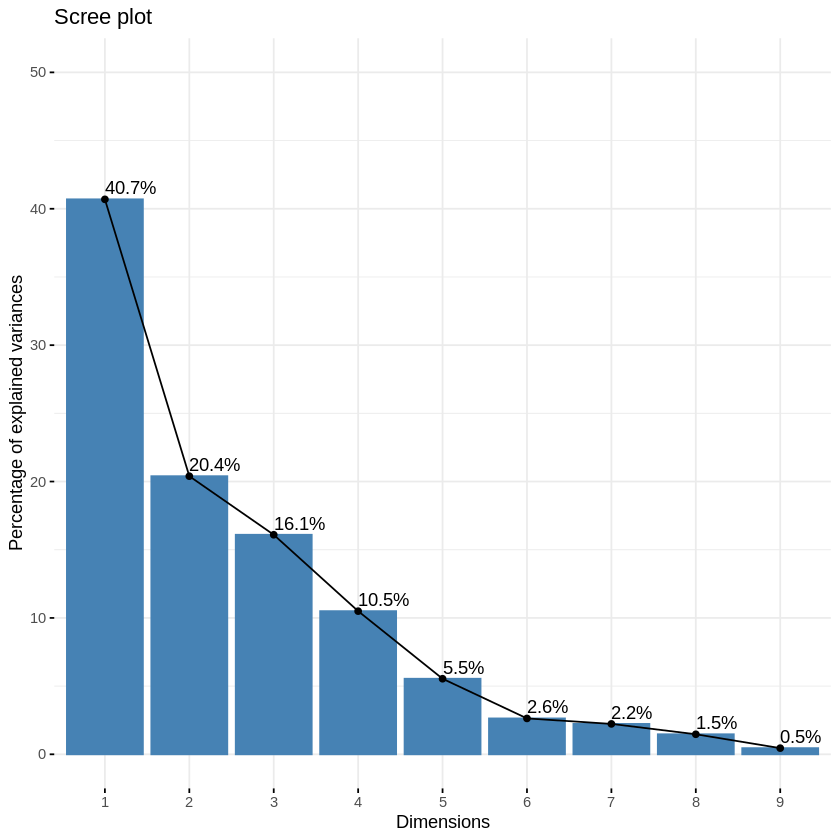

In [63]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))

**Quality of representation**

In [64]:
install.packages ("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [65]:
var <- get_pca_var(res.pca)

corrplot 0.92 loaded



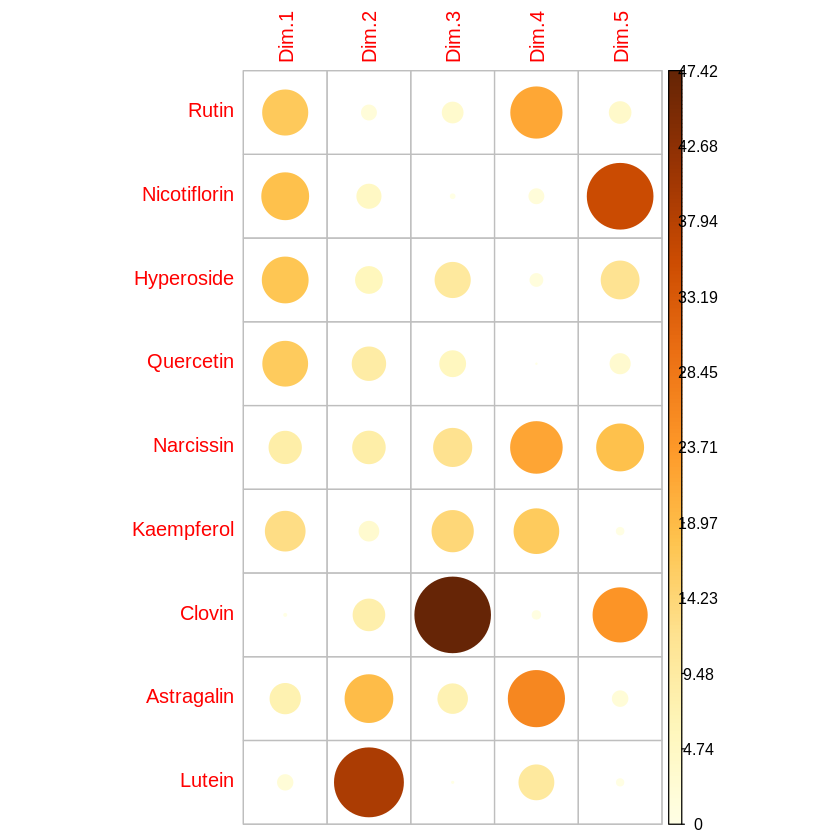

In [66]:
library("corrplot")
corrplot(var$contrib, is.corr=FALSE)

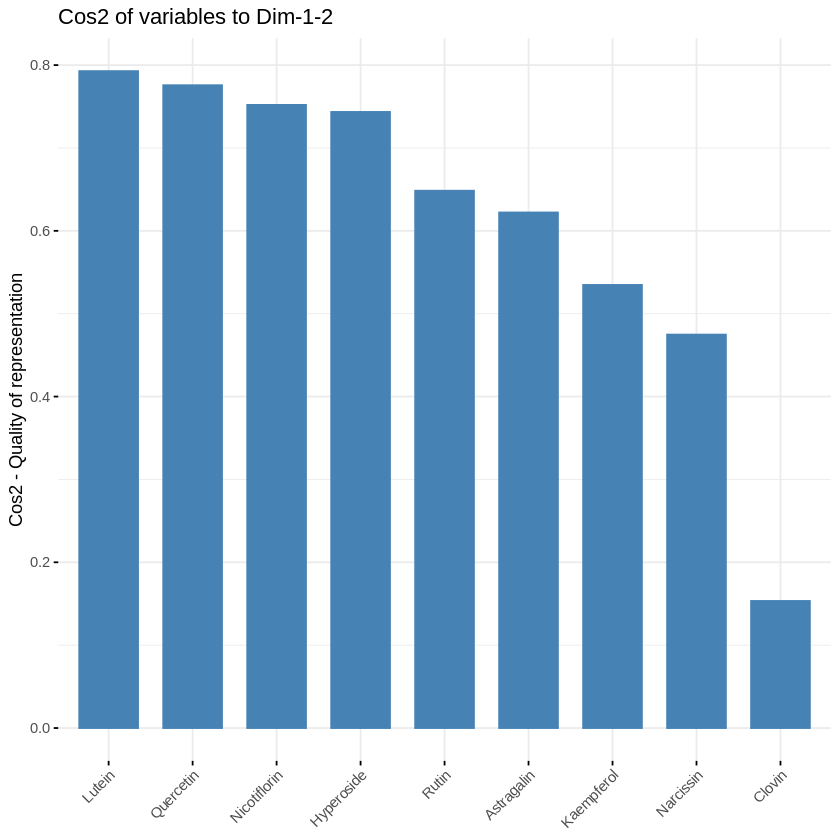

In [67]:
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2)

**PCA GRAPH**

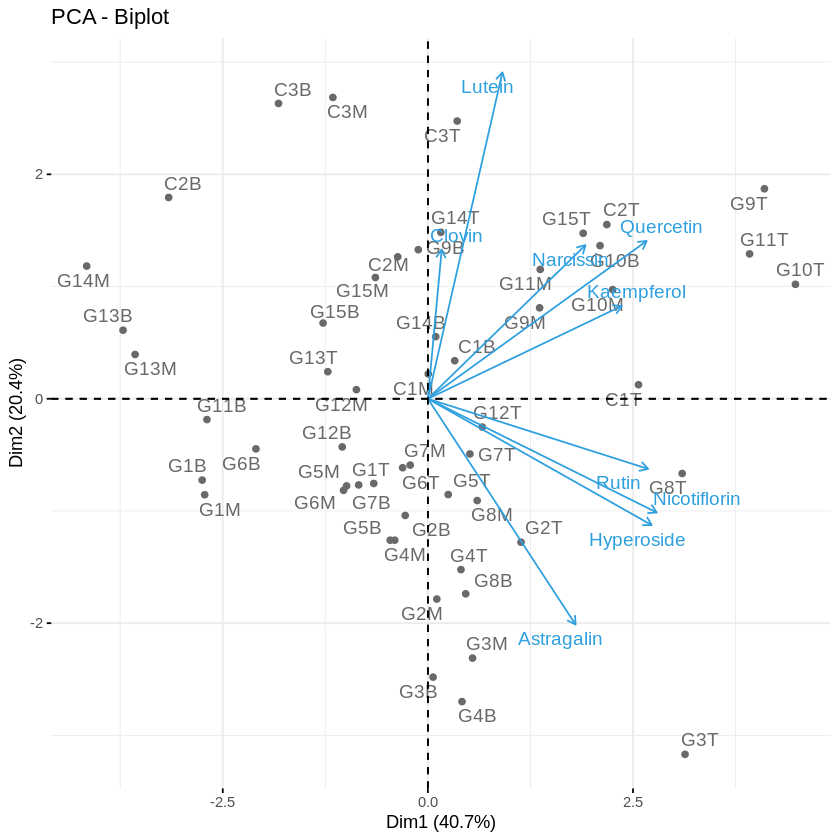

In [68]:
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

Dapat dilihat pada gambar di atas terdapat beberapa penjelasan yang dapat kita simpulkan, diantaranya:
1. Terdapat beberapa genotipe yang memiliki tingkat keragaman kandungan metabolit yang tinggi di bandingkan dengan genotipe lainnya
2. Genotipe dengan Golongan kadar Lutein yang tinggi: Gen Des HC 3 T
3. Genotipe dengan Golongan Kadar Quercetrine, Kampefrol, & Narcisin yang tinggi antara lain:  Des H G10 M, Des H G9 M, Des H G15 T, Des H C2 T
5. Genotipe dengan Golongan kandungan Nicotoflorin dan Hyperoside tinggi: Des HG8 T & Des HG2 T
6. Genotipe denan Golongan Kandungan Astragalin Tinggi: Des H G2 M Des Hg4 T

**ANALISA PCA BERDASARKAN KERAGAMAN KANDUNGAN METABOLIT PER BAGIAN TANAMAN**

In [70]:
iris.pca <- PCA(df[,5:11], graph = FALSE)

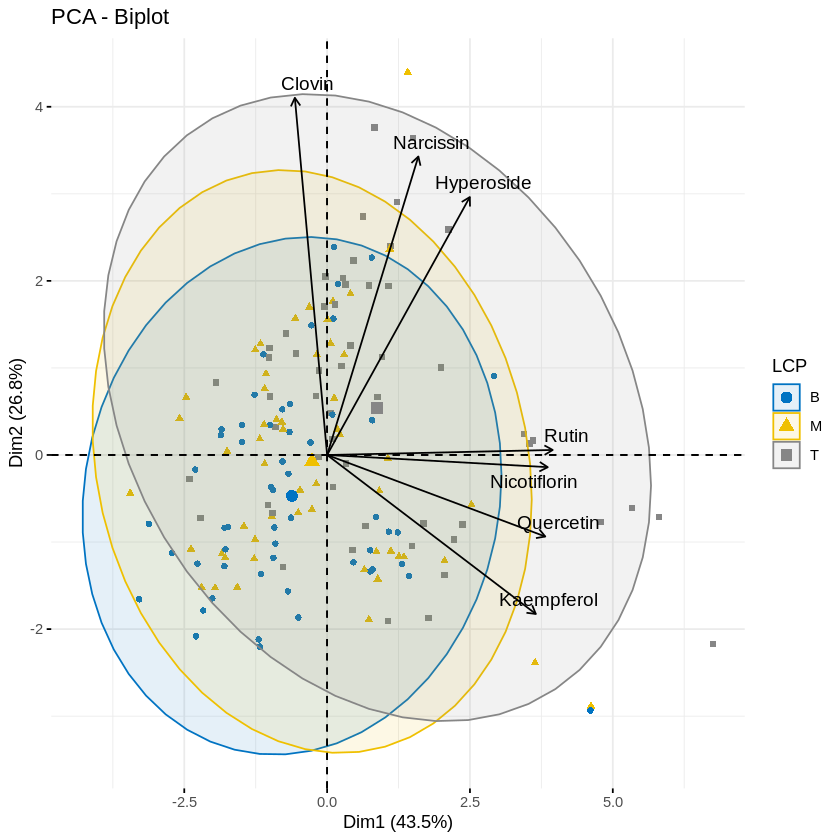

In [72]:
fviz_pca_biplot(iris.pca,
                col.ind = df$Position, palette = "jco",
                addEllipses = TRUE, label = "var",
                col.var = "black", repel = TRUE,
                legend.title = "LCP")

Dapat Dilihat bahwa dominasi keragaman kandungan metabolit tanaman terjadi pada bagian pengambilan sampel daun bagian atas, hal ini ditunjukkan oleh ordinasi PCA yang tergambar dalam bentuk luasan lingkaran pada bagian T/Top lebih besar dibandingkan bagian lainnya.

**ANALISA PCA BERDASARKAN KERAGAMAN KANDUNGAN METABOLIT SECARA SPATIAL TEMPORAL**

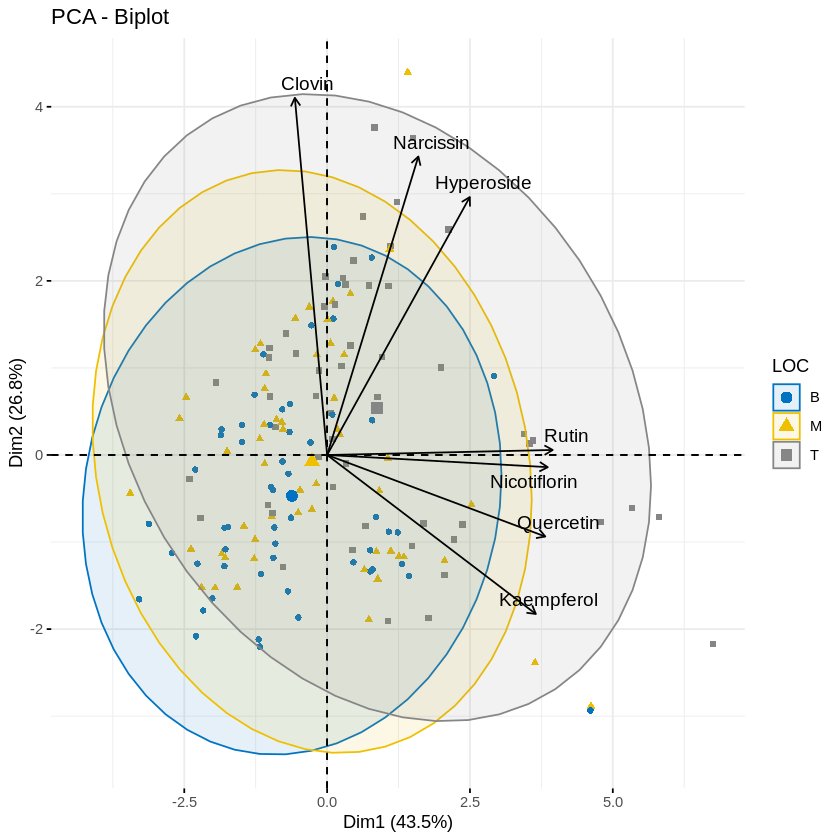

In [73]:
fviz_pca_biplot(iris.pca,
                col.ind = df$Position, palette = "jco",
                addEllipses = TRUE, label = "var",
                col.var = "black", repel = TRUE,
                legend.title = "LOC")

Dapat Dilihat bahwa dominasi keragaman kandungan metabolit tanaman terjadi pada saat pengambilan sampel dilakukan bulan Desember di daerah Haurgombong, hal ini ditunjukkan oleh ordinasi PCA yang tergambar dalam bentuk luasan lingkaran pada bagian DH lebih besar dibandingkan bagian lainnya.

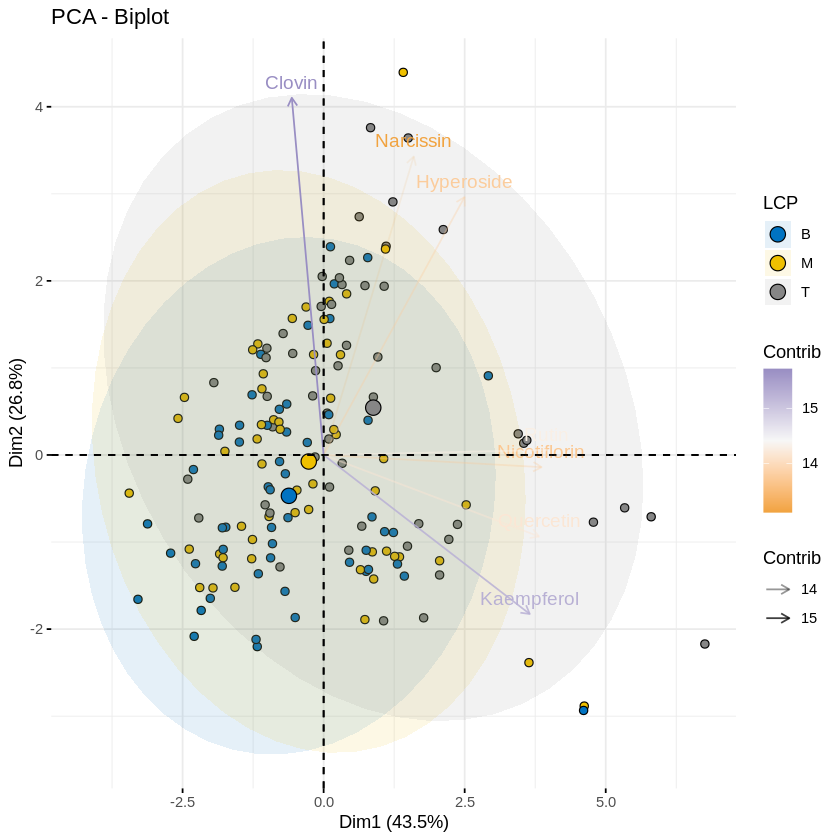

In [74]:
fviz_pca_biplot(iris.pca,
                # Individuals
                geom.ind = "point",
                fill.ind = df$Position, col.ind = "black",
                pointshape = 21, pointsize = 2,
                palette = "jco",
                addEllipses = TRUE,
                # Variables
                alpha.var ="contrib", col.var = "contrib",
                gradient.cols = "PuOr",

                legend.title = list(fill = "LCP", color = "Contrib",
                                    alpha = "Contrib")
                )

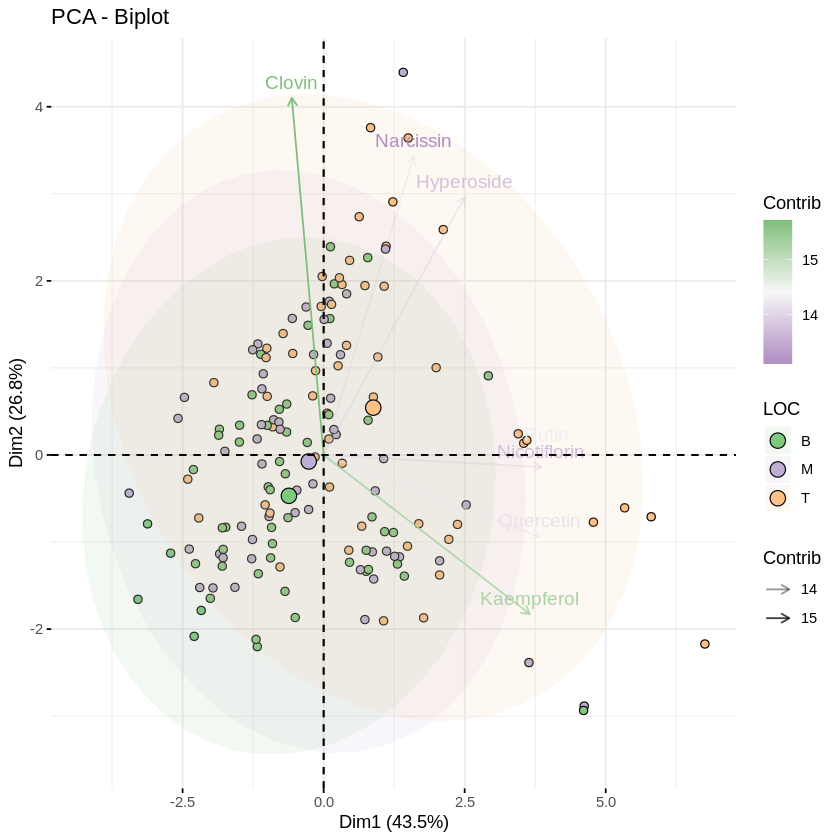

In [75]:
fviz_pca_biplot(iris.pca,
                # Individuals
                geom.ind = "point",
                fill.ind = df$Position, col.ind = "black",
                pointshape = 21, pointsize = 2,
                palette = "Accent",
                addEllipses = TRUE,
                # Variables
                alpha.var ="contrib", col.var = "contrib",
                gradient.cols = "PRGn",

                legend.title = list(fill = "LOC", color = "Contrib",
                                    alpha = "Contrib")
                )

Dapat dilihat dari dua gambar PCA diatas, terdapat beberapa hal yang dapat disimpulkan, antara lain:
1. Terdapat variabel yang memiliki kontribusi yang besar terhadap keragaman
2. Variael seperti TFC, Kaemprefol, & rutin memiliki kontribusi yang kuat terhadap pengaruh keragaman Metabolit yang ada
2. Variabel seperti Hyperoside memiliki kontribusi yang lemah terhadap pengaruh keragaman Metabolit yang ada.

**Analisa Clustering HeatMaps**

In [76]:
head(df1)

,Rutin,Nicotiflorin,Hyperoside,Quercetin,Narcissin,Kaempferol,Clovin,Astragalin,Lutein
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G1T,21.97692,15.578706,0.2020886,0.04882631,0.13086493,0.013264676,0.002698415,-0.22131275,0.020776096
G1M,12.35904,8.897072,0.3397057,0.01721126,0.08489612,0.003134538,0.002880002,-0.15252847,0.009748685
G1B,12.49300,10.493353,0.1584901,0.03349094,0.01177922,0.007766907,0.002242289,-0.22739025,0.001440072
G2T,29.56206,14.618831,1.3728638,0.04098771,0.28449797,0.002111304,0.019340590,-0.02103070,0.033132961
G2M,26.16121,14.124678,1.1423939,0.01462969,0.18990751,0.001584745,0.007879139,-0.03091039,0.040891751
G2B,23.68743,12.794263,0.7970838,0.05995637,0.16177488,0.006477156,0.005683449,-0.10853592,0.041052339


In [77]:
dfs <- scale(df1)

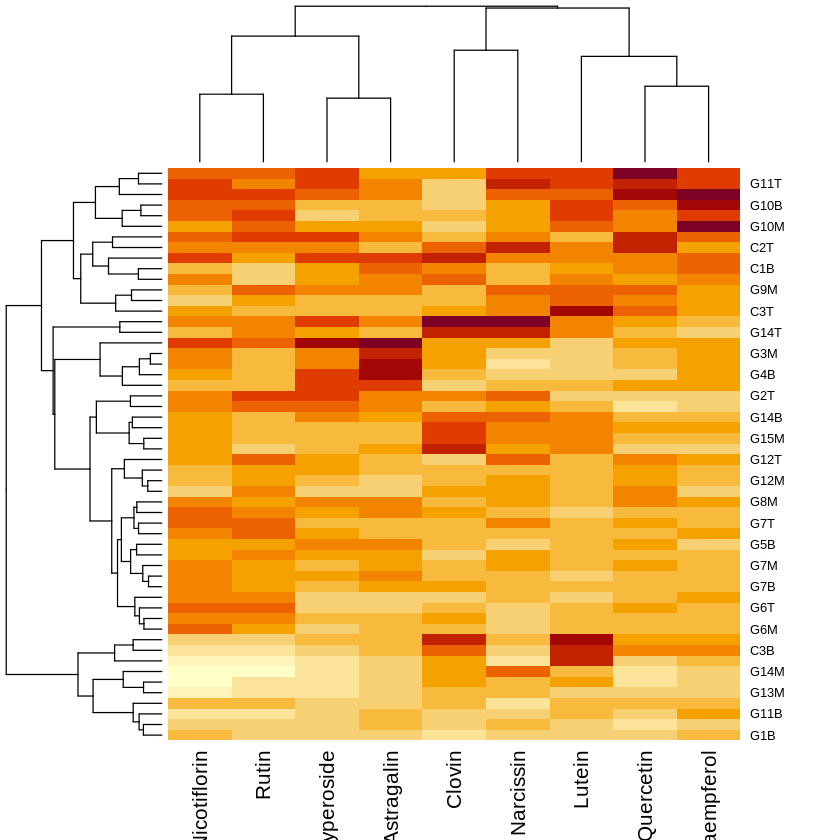

In [78]:
heatmap(dfs, scale = "non")

In [79]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("ComplexHeatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.3 (2024-02-29)

Installing package(s) 'BiocVersion', 'ComplexHeatmap'

also installing the dependencies ‘shape’, ‘rjson’, ‘BiocGenerics’, ‘S4Vectors’, ‘iterators’, ‘circlize’, ‘GetoptLong’, ‘clue’, ‘GlobalOptions’, ‘png’, ‘IRanges’, ‘matrixStats’, ‘foreach’, ‘doParallel’


Old packages: 'bit', 'callr', 'curl', 'data.table', 'DBI', 'devtools',
  'gargle', 'ggplot2', 'highr', 'isoband', 'openssl', 'ragg', 'rmarkdown',
  'rvest', 'textshaping', 'usethis', 'whisker', 'xfun', 'zip', 'boot', 'nlme',
  'survival'



In [80]:
library("ComplexHeatmap")

Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




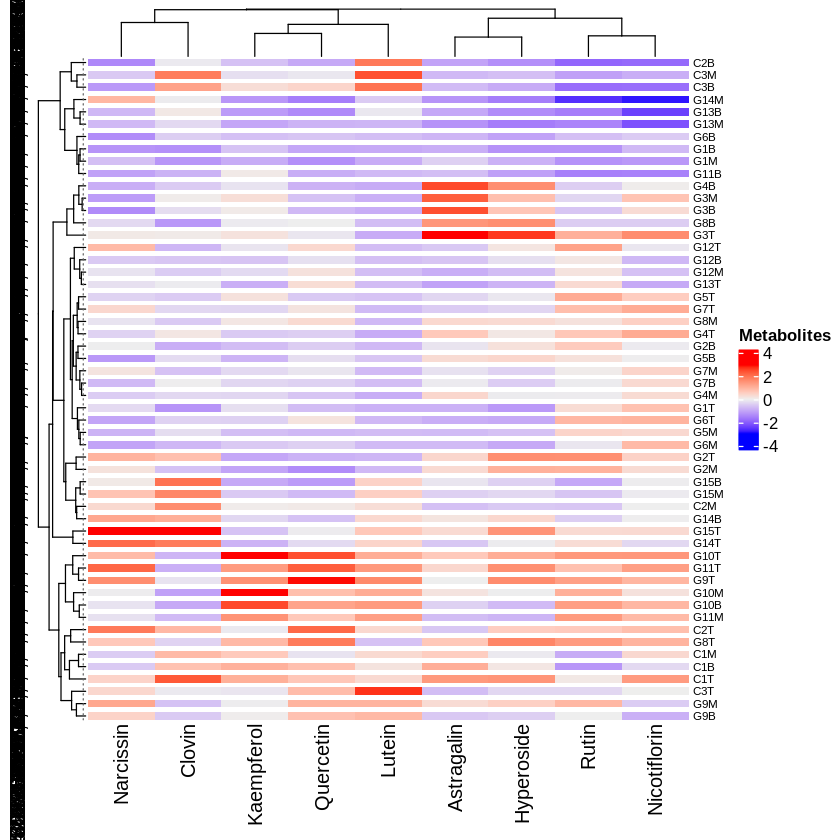

In [82]:
# Split by combining multiple variables
Heatmap(dfs, name ="Metabolites",
        split = data.frame(cyl = df1$Rutin, am = df1$Clovin),
        row_names_gp = gpar(fontsize = 7))

Berdasarkan gambar visualisasi clustering heatmpas di atas, dapat disimpulkan beberapa hal antara lain:
1. pada Variabel kandungan metabolit terbagi menjadi 7 cluster utama
2. Genotipe-Genotipe terbagi menjadi beberapa cluster berdasarkan tinggi/tidaknya kandungan metabolit yang ada
3. Terdapat genotipe-genotipe dengan kandungan metabolit yang tinggi pada hampir semua jenis metabolit seperti Genotipe Des HG3 T, Des HG15 T, Des HC1 T, Des HG2 T
4. Terdapat genotipe-genotipe dengan kandungan metabolit yang cukup baik seperti Genotipe Des HG6 B, Des HG12 B, Des HG12 M, Des HG1 T
5. Terdapat genotipe- genotipe dengan kandungan metabolit rendah seperti Genotipe Des HG13 B, Des HG13 M, Des HG11 B, Des HG1 M, Des HG1 B, Des HG13 M

In [24]:
head(df)

,GENR,GEN,Position,Loc,Rutin,Nicotiflorin,Hyperoside,Quercetin,Narcissin,Kaempferol,Clovin,Astragalin,Lutein
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,G1T,G1,T,HGB-Dec,21.97692,15.578706,0.2020886,0.04882631,0.13086493,0.013264676,0.002698415,-0.22131275,0.020776096
2,G1M,G1,M,HGB-Dec,12.35904,8.897072,0.3397057,0.01721126,0.08489612,0.003134538,0.002880002,-0.15252847,0.009748685
3,G1B,G1,B,HGB-Dec,12.49300,10.493353,0.1584901,0.03349094,0.01177922,0.007766907,0.002242289,-0.22739025,0.001440072
4,G2T,G2,T,HGB-Dec,29.56206,14.618831,1.3728638,0.04098771,0.28449797,0.002111304,0.019340590,-0.02103070,0.033132961
5,G2M,G2,M,HGB-Dec,26.16121,14.124678,1.1423939,0.01462969,0.18990751,0.001584745,0.007879139,-0.03091039,0.040891751
6,G2B,G2,B,HGB-Dec,23.68743,12.794263,0.7970838,0.05995637,0.16177488,0.006477156,0.005683449,-0.10853592,0.041052339


In [25]:
inspect(df, plot = FALSE)

# A tibble: 13 × 10
   Variable     Class    Missing Levels Valid_n   Min Median   Max Outlier Text 
   <chr>        <chr>    <chr>   <chr>    <int> <dbl>  <dbl> <dbl>   <dbl> <chr>
 1 GENR         charact… No      0          162 NA     NA    NA         NA Line…
 2 GEN          charact… No      0          162 NA     NA    NA         NA Line…
 3 Position     charact… No      0          162 NA     NA    NA         NA Line…
 4 Loc          charact… No      0          162 NA     NA    NA         NA Line…
 5 Rutin        numeric  No      -          162  4.33  16.0  29.6        4 NA   
 6 Nicotiflorin numeric  No      -          162  2.77  10.0  18.6        0 NA   
 7 Hyperoside   numeric  No      -          162  0.03   0.67  2.18       5 NA   
 8 Quercetin    numeric  No      -          162  0      0.04  0.29       9 NA   
 9 Narcissin    numeric  No      -          162 -0.07   0.16  0.69       4 NA   
10 Kaempferol   numeric  No      -          162  0      0.01  0.06      10 NA   
11 Clovi

Warning message:
“Considering the levels of factors, .data should have 1 rows, but it has 162. Use 'as_factor()' for coercing a variable to a factor.”
Warning message:
“Expected three or more factor variables. The data has only 0.”
Warning message:
“Possible text fragments in variable(s) GENR, GEN, Position, Loc.”
Warning message:
“Possible outliers in variable(s) Rutin, Hyperoside, Quercetin, Narcissin, Kaempferol, Clovin, Astragalin, Lutein. Use 'find_outliers()' for more details.”


In [103]:
df$GENR = as.factor(df$GENR)
df$Position = as.factor(df$Position)
df$Loc= as.factor(df$Loc)

In [104]:
str(df)

'data.frame':	162 obs. of  13 variables:
 $ GENR        : Factor w/ 54 levels "C1B","C1M","C1T",..: 30 29 28 33 32 31 36 35 34 39 ...
 $ GEN         : chr  "G1" "G1" "G1" "G2" ...
 $ Position    : Factor w/ 3 levels "B","M","T": 3 2 1 3 2 1 3 2 1 3 ...
 $ Loc         : Factor w/ 3 levels "HGB-Dec","HGB-Jan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Rutin       : num  22 12.4 12.5 29.6 26.2 ...
 $ Nicotiflorin: num  15.6 8.9 10.5 14.6 14.1 ...
 $ Hyperoside  : num  0.202 0.34 0.158 1.373 1.142 ...
 $ Quercetin   : num  0.0488 0.0172 0.0335 0.041 0.0146 ...
 $ Narcissin   : num  0.1309 0.0849 0.0118 0.2845 0.1899 ...
 $ Kaempferol  : num  0.01326 0.00313 0.00777 0.00211 0.00158 ...
 $ Clovin      : num  0.0027 0.00288 0.00224 0.01934 0.00788 ...
 $ Astragalin  : num  -0.2213 -0.1525 -0.2274 -0.021 -0.0309 ...
 $ Lutein      : num  0.02078 0.00975 0.00144 0.03313 0.04089 ...


In [85]:
library("metan")

In [86]:
library ("openxlsx")

In [87]:
model2 <-
  gamem_met(df,
            env = Loc,
            gen = GEN,
            rep = Position,
            resp = everything())

Evaluating trait Lutein |========================================| 100% 00:00:07 


Method: REML/BLUP

Random effects: GEN, GEN:ENV

Fixed effects: ENV, REP(ENV)

Denominador DF: Satterthwaite's method



---------------------------------------------------------------------------
P-values for Likelihood Ratio Test of the analyzed traits
---------------------------------------------------------------------------
    model  Rutin Nicotiflorin Hyperoside Quercetin Narcissin Kaempferol Clovin
 COMPLETE     NA           NA         NA        NA        NA         NA     NA
      GEN 0.0645     4.90e-01   2.76e-05     0.422   0.00231      0.263 0.8655
  GEN:ENV 0.3025     3.72e-06   4.00e-02     0.094   0.02045      1.000 0.0016
 Astragalin   Lutein
         NA       NA
   0.000013 1.00e+00
   0.004522 1.12e-11
---------------------------------------------------------------------------
Variables with nonsignificant GxE interaction
Rutin Quercetin Kaempferol 
---------------------------------------------------------------------------


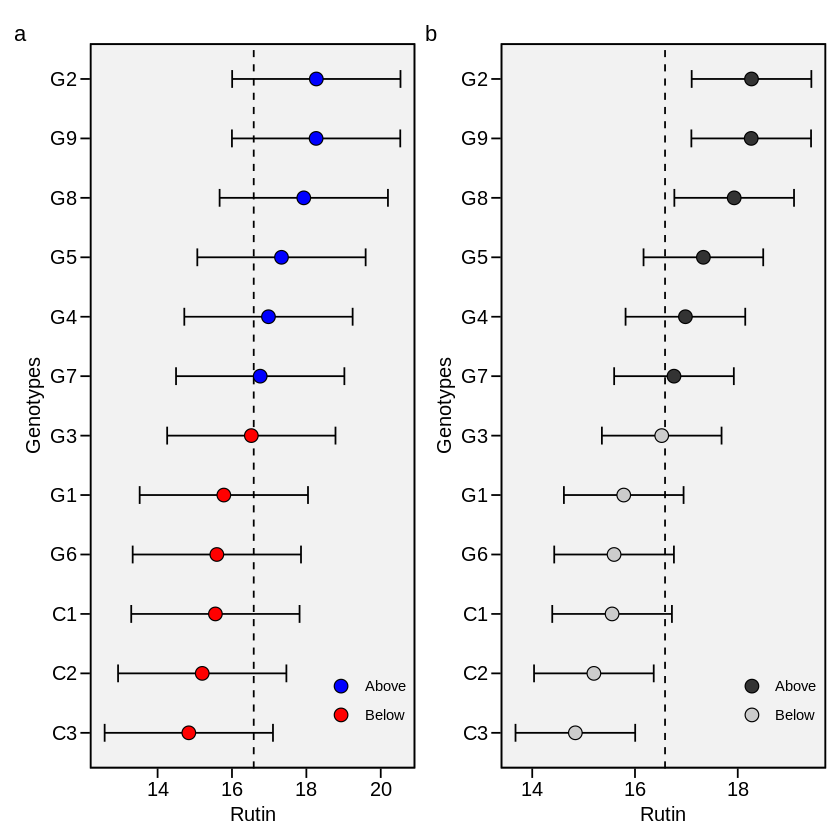

In [88]:
a <- plot_blup(model2)
b <- plot_blup(model2,
               prob = 0.2,
               col.shape = c("gray20", "gray80"),
               invert = TRUE)
arrange_ggplot(a, b, tag_levels = "a")

In [105]:
stats <- ge_stats(df, Loc, GENR, Position, Lutein)

Warning message in anova.lm(lm(Y ~ REP/ENV + ENV * GEN, data = data)):
“ANOVA F-tests on an essentially perfect fit are unreliable”
Warning message in anova.lm(model1):
“ANOVA F-tests on an essentially perfect fit are unreliable”
Warning message in anova.lm(model):
“ANOVA F-tests on an essentially perfect fit are unreliable”


ERROR: Error in if (MSE > 0) F.AMMI[i] <- round(MSAMMI[i]/MSE, 2) else F.AMMI[i] <- NA: missing value where TRUE/FALSE needed


In [ ]:
get_model_data(stats)

Class of the model: ge_stats

Variable extracted: stats



var,GEN,Y,CV,ACV,POLAR,Var,Shukla,Wi_g,Wi_f,⋯,Pi_u,Gai,S1,S2,S3,S6,N1,N2,N3,N4
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TPC,Des H C1,29.17778,15.164378,14.595333,0.189841407,39.154674,4.4815926,89.94095,NA,⋯,16.178214,28.95897,1.3333,37.3333,5.0345,1.1724,4.0000,0.5714286,0.5345,0.1429
TPC,Des H C2,26.32222,6.253834,6.987633,-0.449926454,5.419607,1.5573416,85.98912,NA,⋯,26.110225,26.28822,2.0000,14.3333,1.8824,0.9412,2.3333,0.1944444,0.2318,0.1500
TPC,Des H C3,26.51889,11.334808,12.528959,0.057243354,18.070452,1.2054444,85.36639,NA,⋯,31.076525,26.40588,0.3333,4.3333,1.3684,0.7368,1.3333,0.1111111,0.1342,0.0263
TPC,Des H G1,24.38111,19.053277,23.787354,0.614105699,43.159496,8.3353759,67.31975,NA,⋯,59.912644,24.07604,4.3333,66.3333,2.6667,1.3333,5.0000,0.3125000,0.4156,0.2708
TPC,Des H G10,27.90000,14.383472,14.771515,0.200263495,32.208156,4.9001157,84.27043,NA,⋯,26.609769,27.70444,3.0000,34.3333,4.2000,1.0000,3.6667,0.4583333,0.5316,0.3333
TPC,Des H G11,28.90667,14.146673,13.801190,0.141246478,33.445267,37.3233504,68.63151,NA,⋯,7.075600,28.72226,5.6667,76.3333,18.3200,2.3200,5.6667,0.4358974,0.6688,0.5312
TPC,Des H G12,25.81333,11.127355,12.789611,0.075128105,16.500689,8.1041782,74.80500,NA,⋯,34.414944,25.70175,1.3333,60.3333,10.7059,2.2353,5.0000,0.3125000,0.4757,0.1000
TPC,Des H G13,28.01889,13.639837,13.921800,0.148804211,29.211252,8.5736611,80.95350,NA,⋯,19.096469,27.83711,2.6667,49.3333,10.6400,1.7600,4.6667,0.5185185,0.5376,0.2500
TPC,Des H G14,30.68333,11.814415,10.571820,-0.090287048,26.282067,3.7265393,95.86049,NA,⋯,6.641272,30.53979,0.6667,22.3333,1.2500,0.5000,3.0000,0.7500000,0.6809,0.1176


In [106]:
mtsi_mod <- df %>% waas(Loc, GEN, Position, everything()) %>% mtsi()

variable Rutin 
---------------------------------------------------------------------------
AMMI analysis table
---------------------------------------------------------------------------
    Source  Df Sum Sq Mean Sq F value   Pr(>F) Proportion Accumulated
       ENV   2 1007.6  503.80    2.89 1.32e-01         NA          NA
  REP(ENV)   6 1047.0  174.50   19.96 4.52e-16         NA          NA
       GEN  11  416.8   37.89    4.33 1.91e-05         NA          NA
   GEN:ENV  22  322.0   14.64    1.67 4.17e-02         NA          NA
       PC1  12  301.0   25.08    2.87 1.70e-03       93.6        93.6
       PC2  10   20.6    2.06    0.24 9.92e-01        6.4       100.0
 Residuals 120 1049.3    8.74      NA       NA         NA          NA
     Total 183 4164.3   22.76      NA       NA         NA          NA
---------------------------------------------------------------------------

variable Nicotiflorin 
---------------------------------------------------------------------------
AMMI a

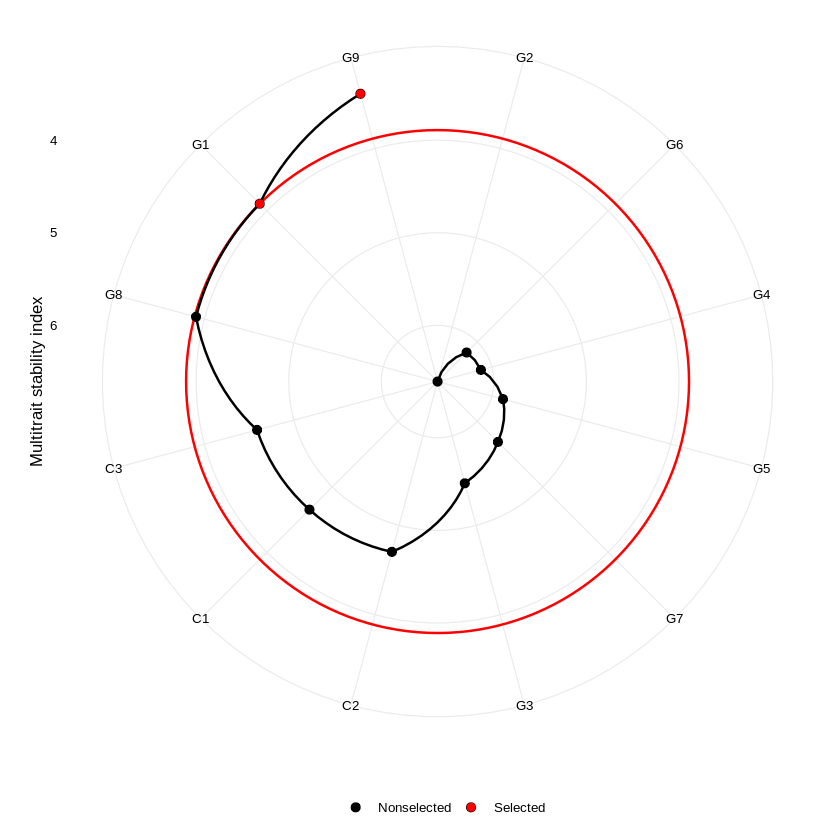

In [107]:
plot(mtsi_mod)